For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

**Import packages**

Import relevant Python packages. Use train_test_split, LogisticRegression, and various imports from sklearn.metrics to build, visualize, and evalute the model.

In [2]:
### Your code goes here

# TASK 1: IMPORT PACKAGES
# ============================================================================
# Import essential Python libraries for the complete machine learning pipeline including NumPy for numerical computations, Pandas for data manipulation and analysis, Matplotlib and Seaborn for data visualization, and scikit-learn modules for model training, validation, and comprehensive performance evaluation of the classification model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

print("✓ All packages imported successfully")

✓ All packages imported successfully


**Load the dataset**
The dataset Invistico_Airline.csv is loaded. The resulting pandas DataFrame is saved as a variable named df_original. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# TASK 2: LOAD THE DATASET
# ============================================================================
# Import the Invistico Airline customer satisfaction dataset from a CSV file into a Pandas DataFrame to begin the data analysis workflow, enabling subsequent exploration, preprocessing, feature engineering, and predictive modeling tasks

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

**Output the first 10 rows**
Output the first 10 rows of data.

In [4]:
### Your code goes here

# TASK 3: EXPLORE THE DATASET STRUCTURE
# ============================================================================
# Display the first 10 rows of the airline dataset to gain initial insights into the data structure, examine column names and their respective data types, observe sample values across all features, and identify any immediately apparent patterns or data quality issues before proceeding with detailed analysis

print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
print(df_original.head(10))


FIRST 10 ROWS OF THE DATASET
  satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   
5    satisfied  Loyal Customer   30  Personal Travel       Eco   
6    satisfied  Loyal Customer   66  Personal Travel       Eco   
7    satisfied  Loyal Customer   10  Personal Travel       Eco   
8    satisfied  Loyal Customer   56  Personal Travel  Business   
9    satisfied  Loyal Customer   22  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138            

**Explore the data**

Check the data type of each column. Note that logistic regression models expect numeric data.

In [5]:
### Your code goes here

# TASK 4: EXAMINE DATA TYPES AND STATISTICAL SUMMARY
# ============================================================================
# Perform comprehensive data profiling by examining the data type of each column to distinguish between numerical and categorical features, display dataset dimensions (rows and columns) to understand the scale of data, and generate descriptive statistics including measures of central tendency, dispersion, and distribution to identify potential outliers, data ranges, and patterns that will inform preprocessing decisions

print("\n" + "="*80)
print("DATA TYPES AND STRUCTURE")
print("="*80)
print(df_original.dtypes)
print(f"\nDataset shape: {df_original.shape}")
print(f"Total columns: {len(df_original.columns)}")

# Display basic statistics
print("\n" + "="*80)
print("BASIC STATISTICS")
print("="*80)
print(df_original.describe())


DATA TYPES AND STRUCTURE
satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes     

**Check the number of satisfied customers in the dataset**

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.


CUSTOMER SATISFACTION DISTRIBUTION
satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

Percentage of satisfied customers: 54.73%


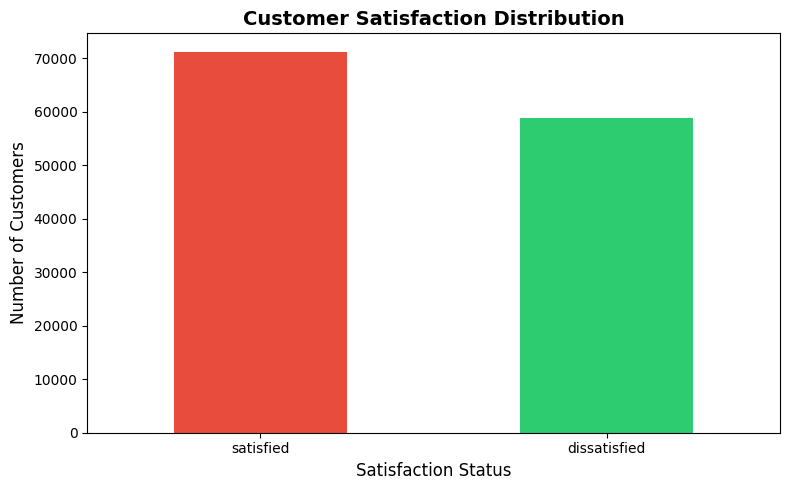


BASIC STATISTICS
                 Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                        

In [6]:
### Your code goes here

# ============================================================================
# TASK 5: CHECK THE NUMBER OF SATISFIED CUSTOMERS
# ============================================================================
print("\n" + "="*80)
print("CUSTOMER SATISFACTION DISTRIBUTION")
print("="*80)
satisfaction_counts = df_original['satisfaction'].value_counts()
print(satisfaction_counts)
print(f"\nPercentage of satisfied customers: {(satisfaction_counts['satisfied'] / len(df_original) * 100):.2f}%")

# Visualize satisfaction distribution
plt.figure(figsize=(8, 5))
satisfaction_counts.plot(kind='bar', color=['#e74c3c', '#2ecc71'])
plt.title('Customer Satisfaction Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Display basic statistics
print("\n" + "="*80)
print("BASIC STATISTICS")
print("="*80)
print(df_original.describe())

**Check for missing values**

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [8]:
###your code goes here
# ============================================================================
# TASK 6: CHECK FOR MISSING VALUES
# ============================================================================
# Perform a thorough missing data assessment by identifying all columns that contain null values and displaying their counts, calculate the total number of missing entries across the entire dataset, and determine the number of rows affected by missing data to evaluate data completeness and decide on appropriate handling strategies such as imputation, deletion, or flagging for further investigation
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_values = df_original.isnull().sum()
print(missing_values[missing_values > 0])

total_missing = df_original.isnull().sum().sum()
print(f"\nTotal missing values: {total_missing}")
print(f"Rows with missing values: {df_original.isnull().any(axis=1).sum()}")


MISSING VALUES ANALYSIS
Arrival Delay in Minutes    393
dtype: int64

Total missing values: 393
Rows with missing values: 393


**Drop the rows with missing values**

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset.

In [9]:
###Your code goes here

# ============================================================================
# TASK 7: DROP ROWS WITH MISSING VALUES
# ============================================================================
# Remove all rows containing any missing values from the dataset to create a complete-case analysis dataset, ensuring data quality and preventing issues during model training, then display before-and-after statistics showing the original dataset size, cleaned dataset size, and the number of rows removed to assess the impact of this data cleaning operation on the overall sample size
# Remove rows containing any missing values
df_subset = df_original.dropna()

print(f"\n✓ Rows with missing values dropped")
print(f"Original dataset size: {len(df_original):,}")
print(f"Cleaned dataset size: {len(df_subset):,}")
print(f"Rows removed: {len(df_original) - len(df_subset):,}")


✓ Rows with missing values dropped
Original dataset size: 129,880
Cleaned dataset size: 129,487
Rows removed: 393


**Prepare the data**



Make the Inflight entertainment column "of type float."

In [10]:
###Your code goes here
# ============================================================================
# TASK 8: PREPARE THE DATA - CONVERT INFLIGHT ENTERTAINMENT TO FLOAT
# ============================================================================
# Convert the 'Inflight entertainment' column from its original data type to float format to ensure numerical compatibility for mathematical operations, statistical analysis, and machine learning model training, then verify the successful conversion by displaying the updated data type to confirm proper preprocessing
# Convert Inflight entertainment column to float type
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)

print(f"\n✓ 'Inflight entertainment' converted to float")
print(f"Data type: {df_subset['Inflight entertainment'].dtype}")


✓ 'Inflight entertainment' converted to float
Data type: float64


C:\Users\hirwa\AppData\Local\Temp\ipykernel_14184\790622523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)


**Convert the categorical column satisfaction into numeric**

Convert the categorical column satisfaction into numeric through one-hot encoding.

In [11]:
###Your code goes here
# ============================================================================
# TASK 9: CONVERT SATISFACTION TO NUMERIC (ONE-HOT ENCODING)
# ============================================================================
# Apply one-hot encoding to transform the categorical 'satisfaction' column into binary numeric columns, creating separate indicator variables for each satisfaction category (e.g., satisfied and neutral/dissatisfied) to enable the data to be used as input for machine learning algorithms that require numerical features, then display the newly created columns to verify the encoding process
# One-hot encode the satisfaction column
# This creates binary columns: satisfied_satisfied and satisfied_neutral or dissatisfied
df_subset = pd.get_dummies(df_subset, columns=['satisfaction'], drop_first=False)

print(f"\n✓ One-hot encoding applied to 'satisfaction' column")
print(f"New columns created: {[col for col in df_subset.columns if 'satisfaction' in col]}")



✓ One-hot encoding applied to 'satisfaction' column
New columns created: ['satisfaction_dissatisfied', 'satisfaction_satisfied']


**Output the first 10 rows of df_subset**

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of df_subset.

In [12]:
### Your code goes here

# ============================================================================
# TASK 10: OUTPUT FIRST 10 ROWS AFTER ONE-HOT ENCODING
# ============================================================================
# Display the first 10 rows of the transformed dataset to verify that the one-hot encoding process was successful, examine how the categorical satisfaction variable has been converted into binary numeric columns, and specifically highlight the satisfaction-related columns to confirm the encoding structure and validate that the data transformation is ready for machine learning model input
print("\n" + "="*80)
print("FIRST 10 ROWS AFTER ONE-HOT ENCODING")
print("="*80)
print(df_subset.head(10))

# Display only satisfaction-related columns for clarity
print("\nSatisfaction columns (first 10 rows):")
satisfaction_cols = [col for col in df_subset.columns if 'satisfaction' in col]
print(df_subset[satisfaction_cols].head(10))


FIRST 10 ROWS AFTER ONE-HOT ENCODING
    Customer Type  Age   Type of Travel     Class  Flight Distance  \
0  Loyal Customer   65  Personal Travel       Eco              265   
1  Loyal Customer   47  Personal Travel  Business             2464   
2  Loyal Customer   15  Personal Travel       Eco             2138   
3  Loyal Customer   60  Personal Travel       Eco              623   
4  Loyal Customer   70  Personal Travel       Eco              354   
5  Loyal Customer   30  Personal Travel       Eco             1894   
6  Loyal Customer   66  Personal Travel       Eco              227   
7  Loyal Customer   10  Personal Travel       Eco             1812   
8  Loyal Customer   56  Personal Travel  Business               73   
9  Loyal Customer   22  Personal Travel       Eco             1556   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0               0   
1             0                                  0 

**Create the training and testing data**

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [13]:
### Your code goes here
# ============================================================================
# TASK 11: CREATE TRAINING AND TESTING DATA (70/30 SPLIT)
# ============================================================================
# Identify the target variable (we want to predict 'satisfied')
# Assuming one-hot encoding created 'satisfaction_satisfied' and 'satisfaction_neutral or dissatisfied'
target_col = 'satisfaction_satisfied'

# Select features (X) and target (y)
# Exclude all satisfaction columns from features
feature_cols = [col for col in df_subset.columns if 'satisfaction' not in col]

# For this analysis, focus on numeric columns only
numeric_cols = df_subset[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

X = df_subset[numeric_cols]
y = df_subset[target_col]

print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeatures used: {numeric_cols}")

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Maintain class balance
)

print(f"\n✓ Data split complete")
print(f"Training set size: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")


TRAIN-TEST SPLIT
Features (X) shape: (129487, 18)
Target (y) shape: (129487,)

Features used: ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

✓ Data split complete
Training set size: 90,640 (70.0%)
Testing set size: 38,847 (30.0%)


**Fit a LogisticRegression model to the data**

Build a logistic regression model and fit the model to the training data.

In [14]:
###your code goes here

# ============================================================================
# TASK 12: FIT LOGISTIC REGRESSION MODEL
# ============================================================================
# Initialize a Logistic Regression classifier with increased maximum iterations to ensure convergence and a fixed random state for reproducibility, then train the model on the prepared training data (X_train features and y_train target labels) to learn the relationships between customer features and satisfaction outcomes, enabling the model to make predictions on new unseen data
print("\n" + "="*80)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*80)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

print("✓ Model training complete")


TRAINING LOGISTIC REGRESSION MODEL
✓ Model training complete


c:\Users\hirwa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Obtain parameter estimates**

Make sure you output the two parameters from your model.

In [15]:
### Output the coefficient
# ============================================================================
# TASK 13: OBTAIN PARAMETER ESTIMATES
# ============================================================================
# Extract and analyze the logistic regression model's learned parameters including the coefficient values (slopes) for each feature, organize them in a DataFrame sorted by absolute magnitude to identify the most influential predictors of customer satisfaction, and specifically highlight the coefficient for 'Inflight entertainment' to understand its impact on the likelihood of customer satisfaction, with positive coefficients indicating features that increase satisfaction probability
print("\n" + "="*80)
print("MODEL PARAMETERS")
print("="*80)

# a) Output the coefficients
print("\na) COEFFICIENTS (Slopes):")
print("-" * 50)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients)

# Highlight the coefficient for Inflight entertainment
inflight_coef = coefficients[coefficients['Feature'] == 'Inflight entertainment']
print(f"\n🎬 KEY INSIGHT - Inflight entertainment coefficient: {inflight_coef['Coefficient'].values[0]:.6f}")



MODEL PARAMETERS

a) COEFFICIENTS (Slopes):
--------------------------------------------------
                              Feature  Coefficient
7              Inflight entertainment     0.882674
9              Ease of Online booking     0.823620
4                      Food and drink    -0.306174
10                   On-board service     0.290235
15                    Online boarding    -0.268827
6               Inflight wifi service    -0.260404
11                   Leg room service     0.230110
13                    Checkin service     0.211747
5                       Gate location     0.149048
14                        Cleanliness    -0.116968
8                      Online support     0.108605
2                        Seat comfort     0.065322
17           Arrival Delay in Minutes    -0.011630
12                   Baggage handling    -0.010622
16         Departure Delay in Minutes     0.007394
3   Departure/Arrival time convenient    -0.003472
0                                 Age

In [16]:
###output the intrcept
# b) Output the intercept
print("\nb) INTERCEPT (Bias term):")
print("-" * 50)
print(f"Intercept: {log_reg.intercept_[0]:.6f}")


b) INTERCEPT (Bias term):
--------------------------------------------------
Intercept: -5.661986


**Predict the outcome for the test dataset**

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called y_pred.

In [17]:
###Your code goes here

# ============================================================================
# TASK 14: PREDICT THE OUTCOME FOR TEST DATASET
# ============================================================================
# Apply the trained logistic regression model to the test dataset features (X_test) to generate binary class predictions for customer satisfaction, producing an array of predicted outcomes that will be compared against the actual test labels (y_test) to evaluate model performance and assess its ability to generalize to unseen data
# Generate predictions on the test set
y_pred = log_reg.predict(X_test)

print(f"\n✓ Predictions generated for test set")
print(f"Number of predictions: {len(y_pred):,}")


✓ Predictions generated for test set
Number of predictions: 38,847


**Print out y_pred** 

In order to examine the predictions, print out y_pred.

In [18]:
###Your code goes here

# ============================================================================
# TASK 15: PRINT OUT y_pred
# ============================================================================
# Display a sample of the model's binary predictions from the test set to visually inspect the prediction patterns, and provide summary statistics showing the total count of customers predicted as satisfied versus not satisfied, giving insight into the overall distribution of predicted outcomes and potential class balance in the model's predictions
print("\n" + "="*80)
print("PREDICTIONS (First 50)")
print("="*80)
print(y_pred[:50])
print(f"\nPredicted satisfied: {y_pred.sum():,}")
print(f"Predicted not satisfied: {(len(y_pred) - y_pred.sum()):,}")


PREDICTIONS (First 50)
[False  True  True False  True  True False False False  True  True  True
  True  True  True False  True  True  True  True False False  True False
 False False  True False  True False  True  True  True False False  True
  True  True False False False  True False  True False  True False False
 False False]

Predicted satisfied: 21,832
Predicted not satisfied: 17,015


Use the predict_proba and predict functions on X_test¶

In [19]:
###Your code goes here

# ============================================================================
# TASK 16: USE PREDICT_PROBA AND PREDICT FUNCTIONS
# ============================================================================
# Generate probability estimates for each class using the predict_proba function to understand the model's confidence level in its predictions, displaying the probability distribution for both "Not Satisfied" and "Satisfied" classes for the first 10 test samples, and compare these probabilities with the final binary predictions to illustrate how the model converts probability scores (above/below 0.5 threshold) into discrete class assignments
print("\n" + "="*80)
print("PREDICTION PROBABILITIES")
print("="*80)

# Get probability predictions
y_pred_proba = log_reg.predict_proba(X_test)

print("First 10 probability predictions:")
print("Format: [Prob(Not Satisfied), Prob(Satisfied)]")
print("-" * 50)
for i in range(10):
    print(f"Customer {i+1}: {y_pred_proba[i]} -> Predicted: {'Satisfied' if y_pred[i]==1 else 'Not Satisfied'}")


PREDICTION PROBABILITIES
First 10 probability predictions:
Format: [Prob(Not Satisfied), Prob(Satisfied)]
--------------------------------------------------
Customer 1: [0.9843882 0.0156118] -> Predicted: Not Satisfied
Customer 2: [0.04041696 0.95958304] -> Predicted: Satisfied
Customer 3: [0.31354652 0.68645348] -> Predicted: Satisfied
Customer 4: [0.69450099 0.30549901] -> Predicted: Not Satisfied
Customer 5: [0.31044826 0.68955174] -> Predicted: Satisfied
Customer 6: [0.17904373 0.82095627] -> Predicted: Satisfied
Customer 7: [0.55657813 0.44342187] -> Predicted: Not Satisfied
Customer 8: [0.87396175 0.12603825] -> Predicted: Not Satisfied
Customer 9: [0.62731677 0.37268323] -> Predicted: Not Satisfied
Customer 10: [0.26718688 0.73281312] -> Predicted: Satisfied


***Analyze the results***

Print out the model's accuracy, precision, recall, and F1 score.

In [20]:
###Your code goes here

# ============================================================================
# TASK 17: ANALYZE THE RESULTS (ACCURACY, PRECISION, RECALL, F1)
# ============================================================================
print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS")
print("="*80)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1 Score:  {f1:.4f}")

print("\n" + "-"*80)
print("METRIC INTERPRETATIONS:")
print("-"*80)
print(f"• Accuracy:  {accuracy*100:.1f}% of all predictions are correct")
print(f"• Precision: {precision*100:.1f}% of predicted 'satisfied' customers are actually satisfied")
print(f"• Recall:    {recall*100:.1f}% of actually satisfied customers were correctly identified")
print(f"• F1 Score:  {f1:.4f} (harmonic mean of precision and recall)")

# Detailed classification report
print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))


MODEL PERFORMANCE METRICS
Accuracy:  0.7967 (79.67%)
Precision: 0.8061 (80.61%)
Recall:    0.8276 (82.76%)
F1 Score:  0.8167

--------------------------------------------------------------------------------
METRIC INTERPRETATIONS:
--------------------------------------------------------------------------------
• Accuracy:  79.7% of all predictions are correct
• Precision: 80.6% of predicted 'satisfied' customers are actually satisfied
• Recall:    82.8% of actually satisfied customers were correctly identified
• F1 Score:  0.8167 (harmonic mean of precision and recall)

DETAILED CLASSIFICATION REPORT
               precision    recall  f1-score   support

Not Satisfied       0.78      0.76      0.77     17582
    Satisfied       0.81      0.83      0.82     21265

     accuracy                           0.80     38847
    macro avg       0.80      0.79      0.79     38847
 weighted avg       0.80      0.80      0.80     38847



**Produce a confusion matrix**

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.


CONFUSION MATRIX
[[13349  4233]
 [ 3666 17599]]

Interpretation:
True Negatives (Correctly predicted NOT satisfied): 13,349
False Positives (Incorrectly predicted satisfied): 4,233
False Negatives (Incorrectly predicted NOT satisfied): 3,666
True Positives (Correctly predicted satisfied): 17,599


<Figure size 800x600 with 0 Axes>

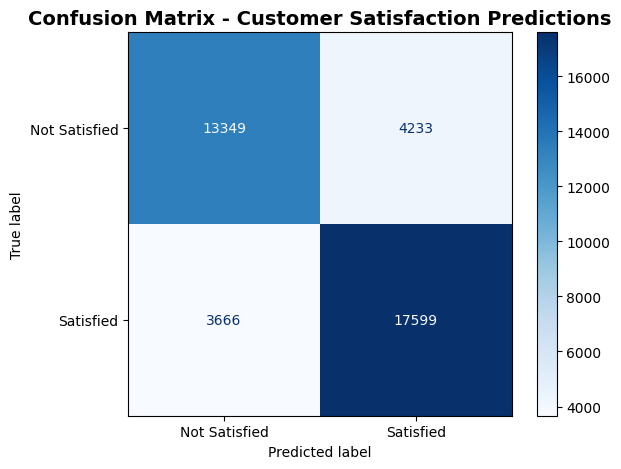

In [21]:
###Your code goes here

# ============================================================================
# TASK 18: PRODUCE A CONFUSION MATRIX
# ============================================================================
# Generate and visualize a confusion matrix to evaluate model performance by comparing predicted classifications against actual test labels, breaking down results into four categories: True Negatives (correctly identified unsatisfied customers), False Positives (unsatisfied customers incorrectly predicted as satisfied), False Negatives (satisfied customers incorrectly predicted as unsatisfied), and True Positives (correctly identified satisfied customers), providing a comprehensive view of prediction accuracy and error patterns that inform model reliability and areas for improvement
print("\n" + "="*80)
print("CONFUSION MATRIX")
print("="*80)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nInterpretation:")
print(f"True Negatives (Correctly predicted NOT satisfied): {cm[0,0]:,}")
print(f"False Positives (Incorrectly predicted satisfied): {cm[0,1]:,}")
print(f"False Negatives (Incorrectly predicted NOT satisfied): {cm[1,0]:,}")
print(f"True Positives (Correctly predicted satisfied): {cm[1,1]:,}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Customer Satisfaction Predictions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
